# LABORATORIO 7 : ML - Aprendizaje No Supervizado

## Punto 1.

- Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 20, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo. <br><br>
- Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo KMeans, metodo del codo y silhouette score.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [150]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar un número aleatorio de centroides entre 2 y 20
n_centers = np.random.randint(2, 21)

# 2. Crear el dataset con centroides bien separados
# center_box define el rango donde se crearán los centroides. Un rango amplio asegura distancia.
# cluster_std define la desviación estándar de los clústeres. Un valor bajo los hace más densos y separados.
X, y = make_blobs(n_samples=2000, 
                  centers=n_centers, 
                  center_box=(-20, 20), 
                  cluster_std=3.8, 
                  random_state=42)

print(f"Dataset generado con {n_centers} clústeres.")

Dataset generado con 12 clústeres.


In [151]:
# Visualización del nuevo dataset
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("Dataset Aleatorio Generado", fontsize=16)

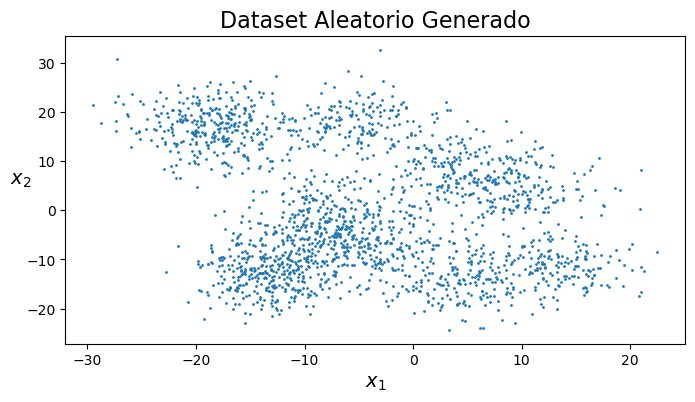

In [152]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [153]:
from sklearn.cluster import KMeans

#k = np.random.randint(2, 21) # Número de clústeres a probar
# Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=n_centers, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


array([ 0,  7,  7, ...,  2, 10,  8], dtype=int32)

In [154]:
kmeans.cluster_centers_

array([[  7.33809136,   6.35814075],
       [-12.79842511, -15.50834928],
       [-22.38947401,  18.04979654],
       [ -6.74210961,  -7.34610581],
       [  4.31092742, -15.8727544 ],
       [ -4.08903162,  17.7441873 ],
       [ 13.82276188, -10.85944204],
       [-16.76235815,  12.00876458],
       [  1.52459722,  -6.46453549],
       [-16.10423823,  19.93222215],
       [-14.55145964,  -8.47177918],
       [ -7.29199373,   1.30889375]])

In [155]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([11,  0, 11, 11], dtype=int32)

In [156]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

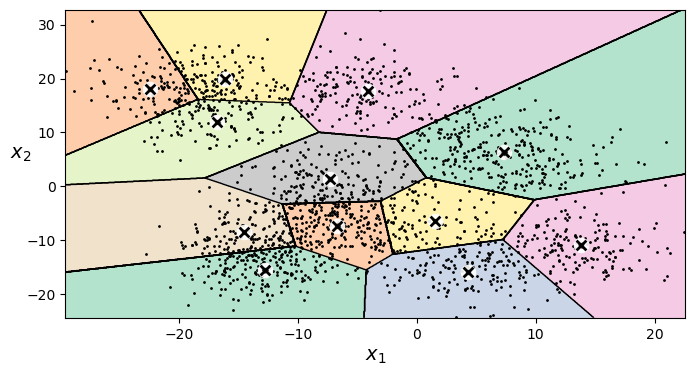

In [157]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [158]:
kmeans.transform(X_new)

array([[ 8.53469248, 21.68736913, 27.54785863, 11.5241371 , 18.38530514,
        16.26651817, 18.87945962, 19.523115  ,  8.6007417 , 24.10209701,
        17.92771979,  7.32467067],
       [ 6.14918104, 23.58246235, 30.03699984, 13.50031087, 17.92076674,
        17.26655157, 16.80765969, 22.15234002,  8.59215773, 26.20184172,
        20.43800124, 10.31517148],
       [10.86983175, 20.94201824, 24.54481775, 11.00205843, 20.23933098,
        14.78435149, 21.79654677, 16.44871853, 10.49044384, 21.41077315,
        16.27998579,  4.6131389 ],
       [11.03455405, 20.50145796, 24.85453429, 10.53324185, 19.77391626,
        15.28303753, 21.48208577, 16.72779441, 10.04165706, 21.80833393,
        15.93160878,  4.45420523]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [159]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                    #  algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
                    #  algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=n_centers, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=3, random_state=4)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=n_centers, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=n_centers, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

KMeans(algorithm='elkan', max_iter=3, n_clusters=12, n_init=1, random_state=5)

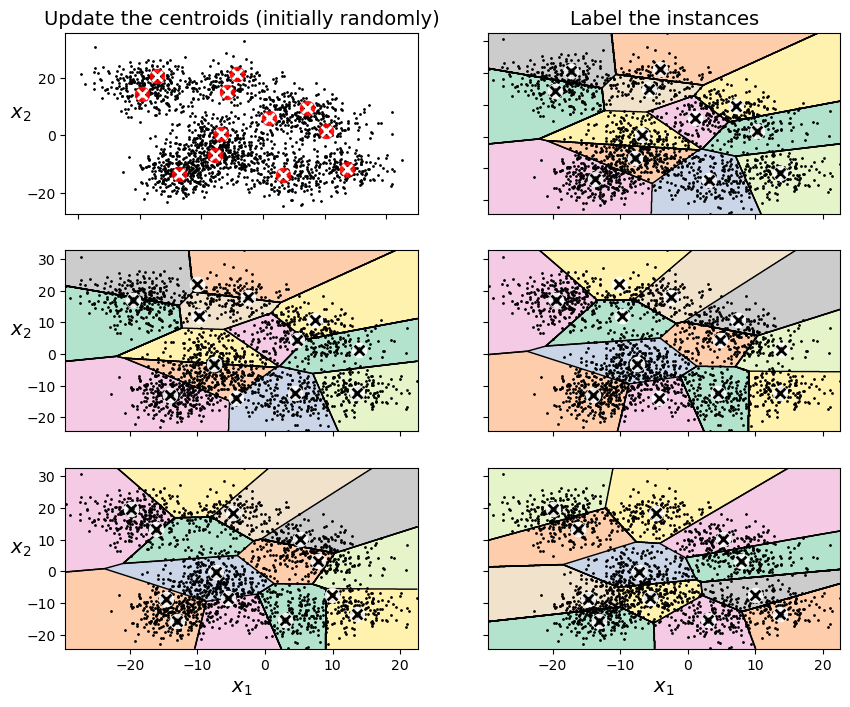

In [160]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [161]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

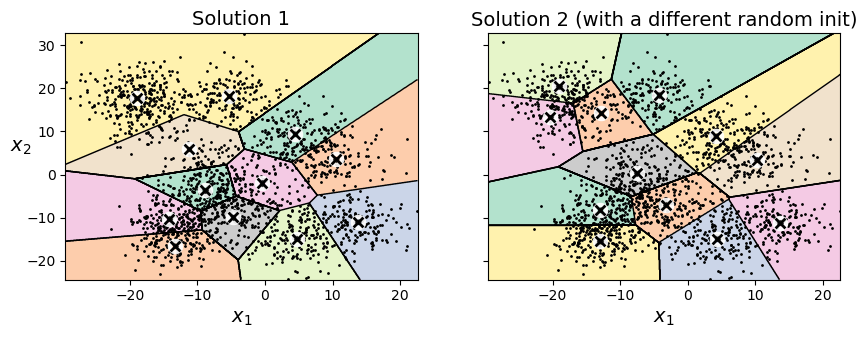

In [162]:
kmeans_rnd_init1 = KMeans(n_clusters=n_centers, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=n_centers, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,"Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [163]:
kmeans_rnd_10_inits = KMeans(n_clusters=n_centers, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

KMeans(algorithm='elkan', init='random', n_clusters=12, n_init=10,
       random_state=11)

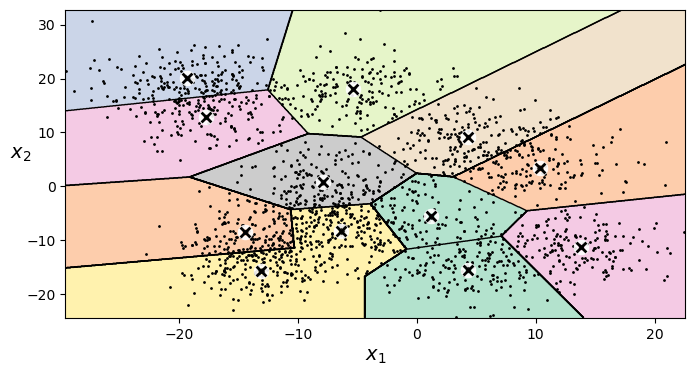

In [164]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [165]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [167]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [168]:
from sklearn.cluster import MiniBatchKMeans

# k = np.random.randint(2, 21) # Número de clústeres a probar
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_centers, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS

In [148]:
best_kmeans.score(X)

-43264.91319372048

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### ENCONTRANDO EL NUMERO OPTIMO DE GRUPOS

### Método del Codo (Elbow Method)

Este código calcula la inercia (suma de las distancias al cuadrado de cada punto a su centroide) para diferentes valores de k. El "codo" en el gráfico (donde la tasa de disminución de la inercia se ralentiza) sugiere el valor óptimo de k, que debería coincidir o estar cerca de "n_centers"

c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

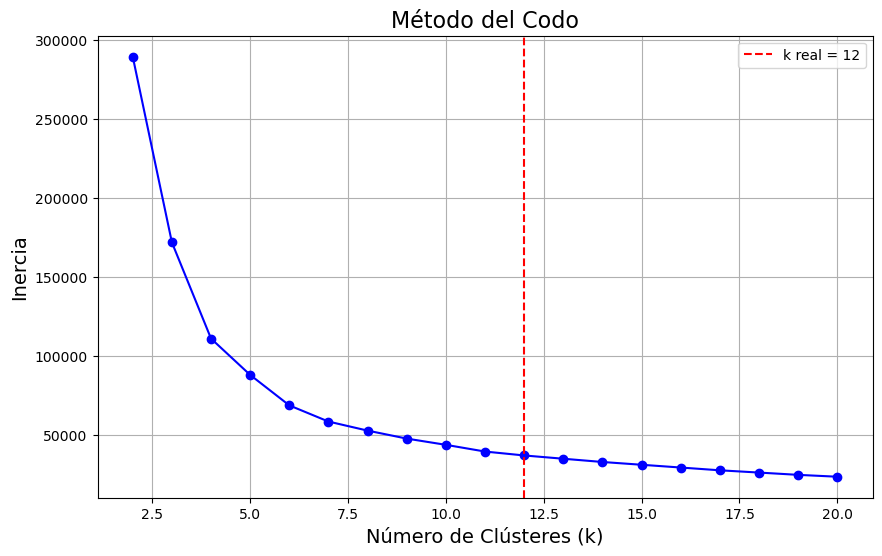

In [169]:
# Método del Codo para encontrar el número óptimo de clústeres
from sklearn.cluster import KMeans

inercias = []
K_range = range(2, 21) # Probaremos con k desde 2 hasta 20

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_model.fit(X)
    inercias.append(kmeans_model.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inercias, 'bo-')
plt.xlabel('Número de Clústeres (k)', fontsize=14)
plt.ylabel('Inercia', fontsize=14)
plt.title('Método del Codo', fontsize=16)
plt.grid(True)
# Línea vertical para mostrar el número real de clústeres (para verificación)
plt.axvline(x=n_centers, color='red', linestyle='--', label=f'k real = {n_centers}')
plt.legend()
plt.show()

### Puntuación de Silueta (Silhouette Score)

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Otra métrica muy útil es el coeficiente de silueta. Este mide qué tan similar es un objeto a su propio cluster en comparación con otros clusters. El valor varía entre -1 y 1:

+1: La muestra está muy lejos de los clusters vecinos.

0: La muestra está muy cerca de la frontera de decisión.

-1: La muestra podría haber sido asignada al cluster incorrecto.
<br><br>

Calcularemos el score promedio de silueta para diferentes valores de k. El valor de k que maximice este score será considerado el óptimo.

In [170]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.3659802661773796

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\hpOmen\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

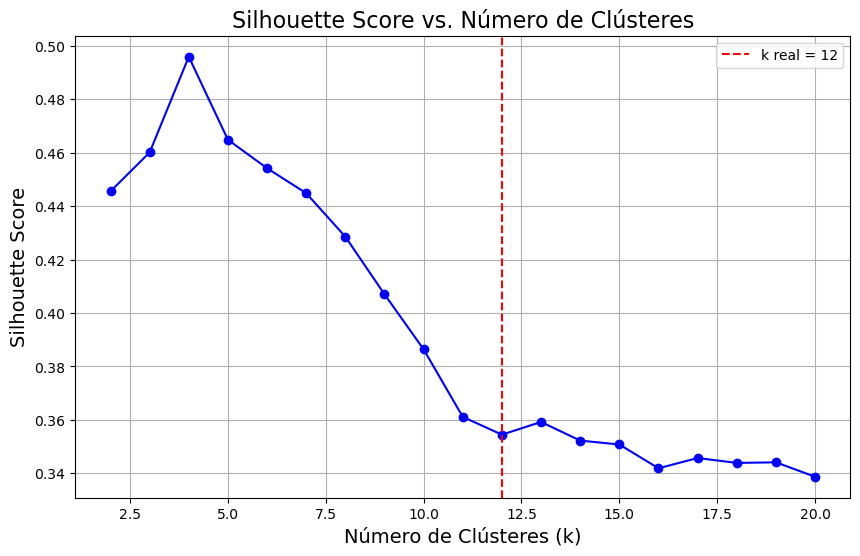

El número óptimo de clústeres según Silhouette Score es: 4


In [172]:
# Definimos el rango máximo para k que queremos probar
max_k = 20
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1, max_k + 1)]

# Calculamos los silhouette scores para k desde 2 hasta max_k
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

# Rango de k para el eje x del gráfico
ks = range(2, max_k + 1)

plt.figure(figsize=(10, 6))
plt.plot(ks, silhouette_scores, "bo-")
plt.xlabel("Número de Clústeres (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score vs. Número de Clústeres", fontsize=16)
# Línea vertical para mostrar el número real de clústeres
plt.axvline(x=n_centers, color='red', linestyle='--', label=f'k real = {n_centers}')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar el k óptimo según el silhouette score
k_optimo_silhouette = ks[np.argmax(silhouette_scores)]
print(f"El número óptimo de clústeres según Silhouette Score es: {k_optimo_silhouette}")

Este código demuestra la efectividad del silhouette score. El valor más alto en el gráfico indica la mejor partición, que también debería coincidir con "n_centers"

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

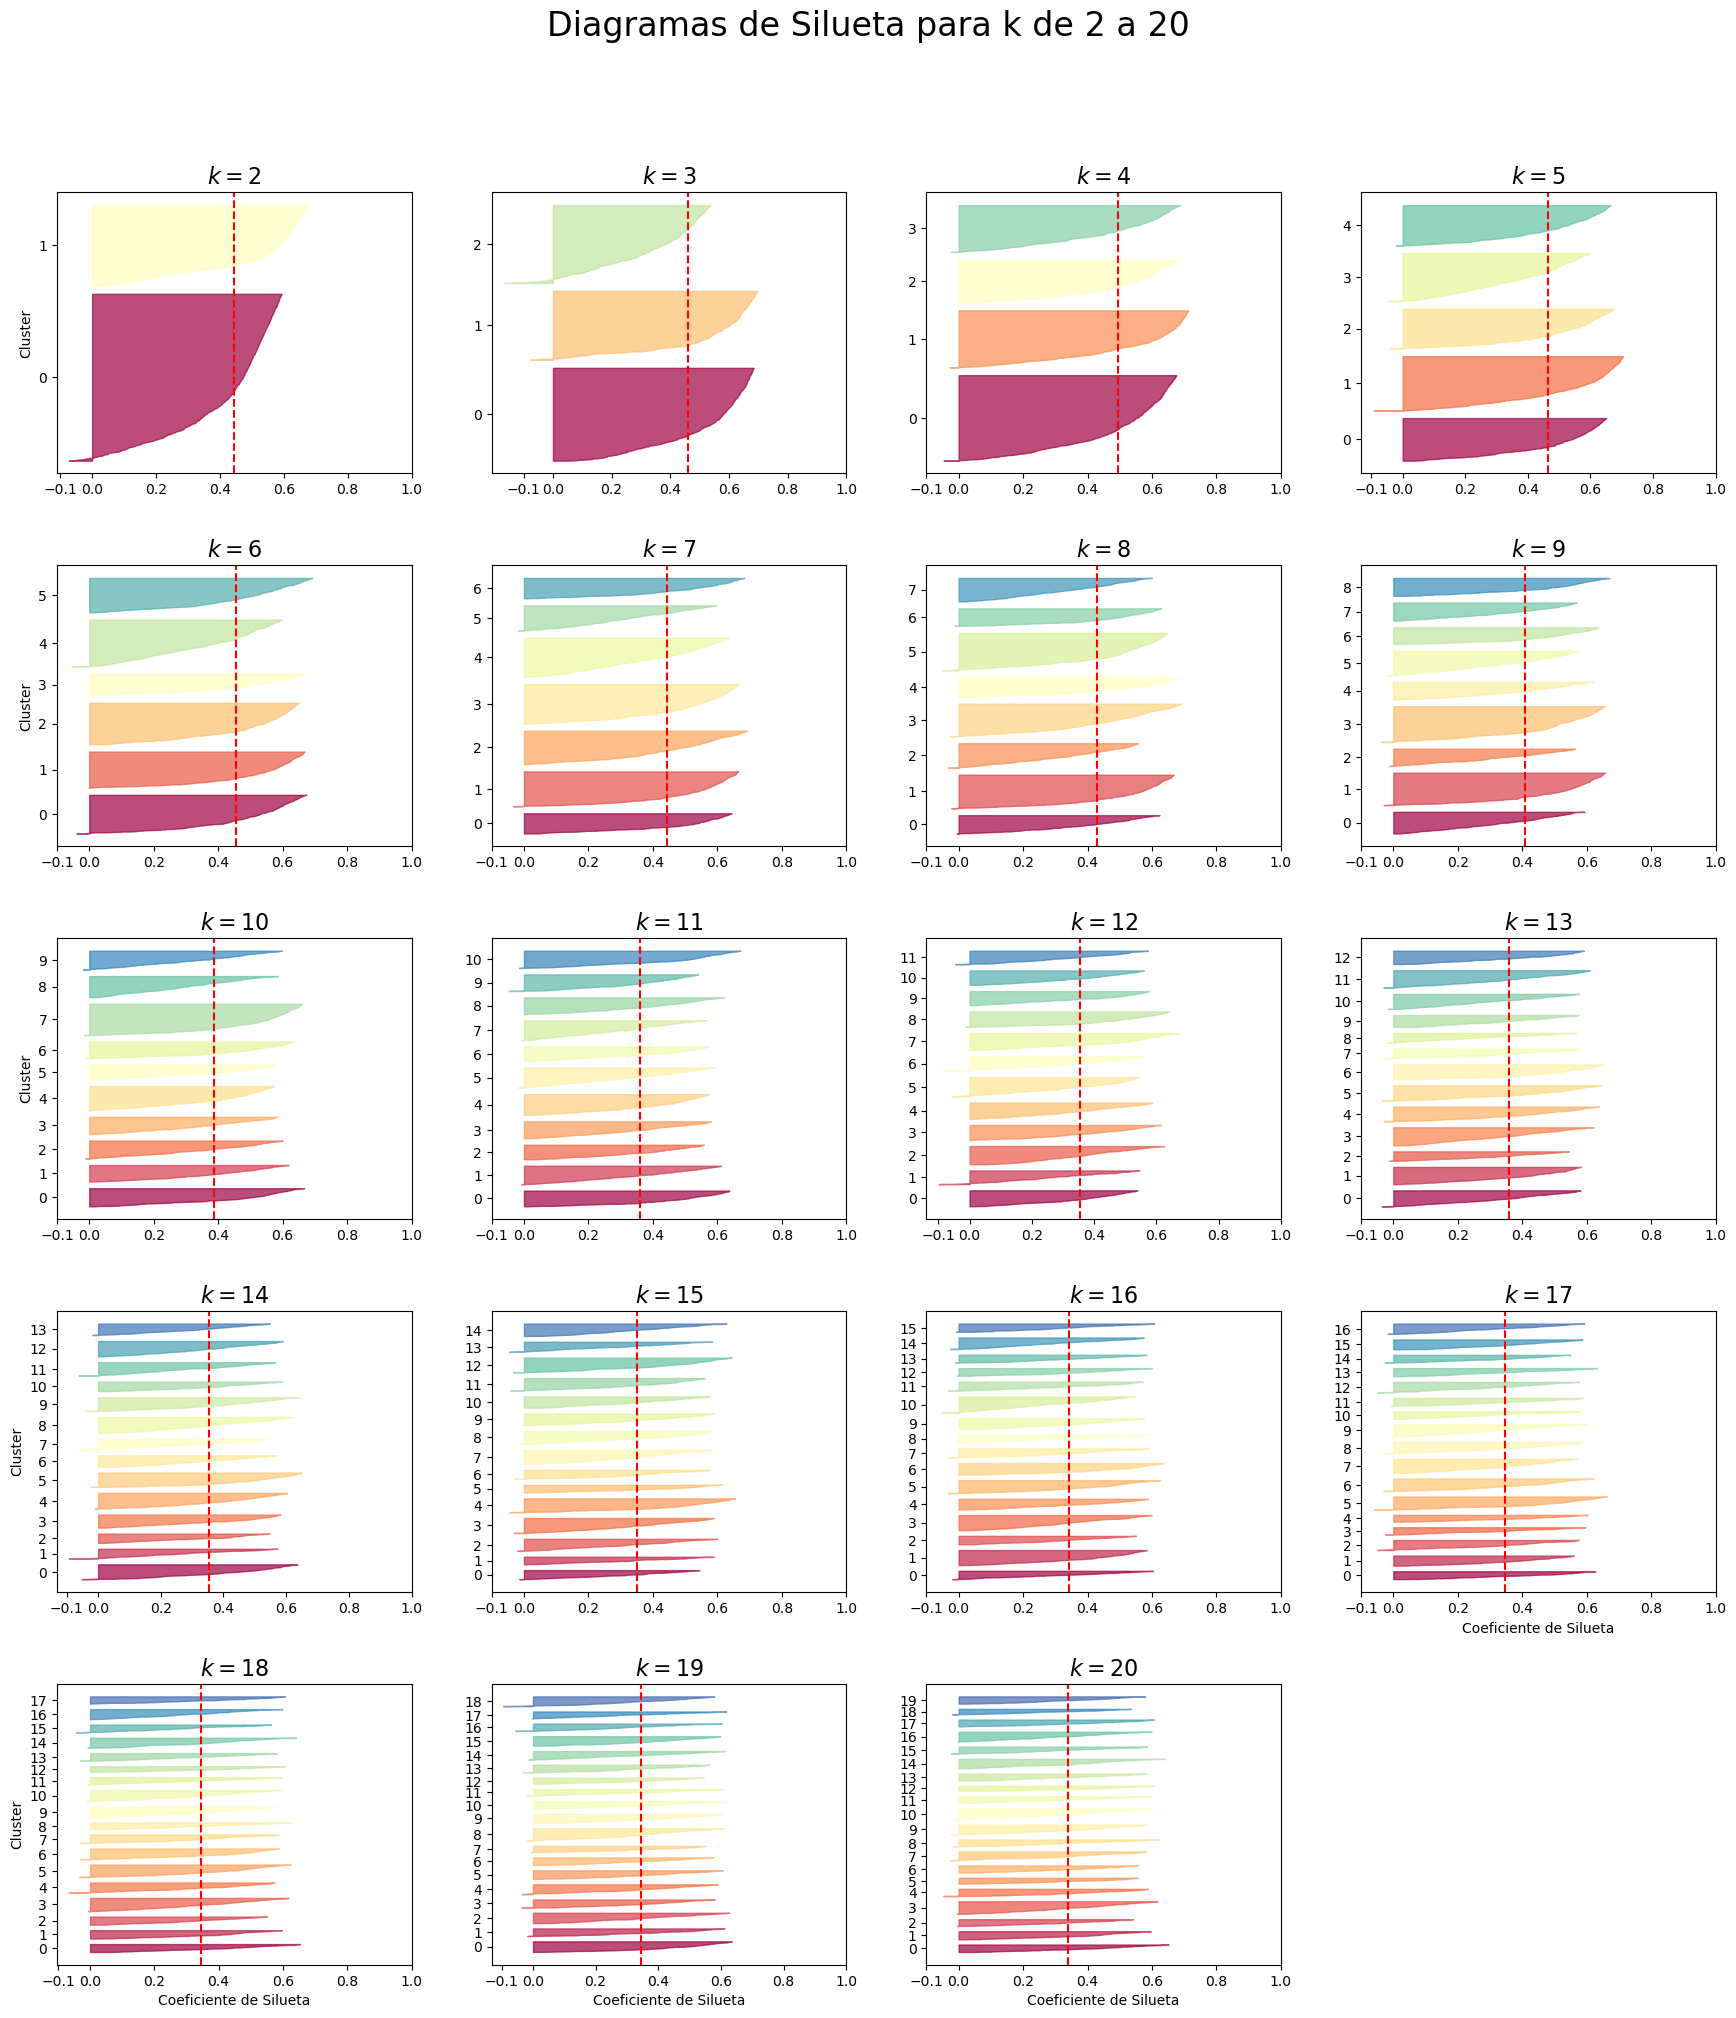

In [176]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# 1. Definimos el rango completo de k que queremos visualizar
ks_to_plot = range(2, 21)

# 2. Creamos una figura grande para una cuadrícula de 5x4 gráficos
plt.figure(figsize=(18, 20))

for k in ks_to_plot:
    # El índice del subplot va de 1 a 19
    plt.subplot(5, 4, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    # 3. Lógica para poner etiquetas solo en los bordes y no saturar el gráfico
    if (k - 2) % 4 == 0: # Solo en la primera columna
        plt.ylabel("Cluster")
    
    if k > 16: # Solo en la última fila
        plt.xlabel("Coeficiente de Silueta")

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.suptitle("Diagramas de Silueta para k de 2 a 20", fontsize=24, y=1.02)
plt.tight_layout(pad=3.0) # Ajusta el espaciado
plt.show()

## Punto 2.

Nombre estudiante: Apaza Villca Cristofer Denilson <br><br>
Nombre del dataset: Incumplimiento de clientes de tarjetas de crédito <br><br>
Link original del dataset: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients <br><br>
Link del drive donde se encuentre el dataset eliminado la y si es que su dataset tuviera y: https://drive.google.com/file/d/1g_Z9r8pBn0MymozB4zU4q5kQTcZaz55b/view?usp=drive_link

- Aplicar aprendizaje semisupervisado


- Aplicar aprendizaje activo

### 1. Cargar el dataset con Pandas

In [ ]:
import pandas as pd
import os

# Define el nombre de tu archivo CSV
ruta = 'C:\IA_PROJECTS\LABORATORIOS\LAB07\CSV_default_of_credit_card_clients_SIN_Y.csv'

try:
    # Carga el CSV omitiendo las 2 primeras filas Y sin tomar la 3ra como encabezado
    df = pd.read_csv(ruta, skiprows=1, header=0)

    # Muestra las primeras 5 filas del DataFrame para verificar
    print("\nDatos cargados correctamente:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: El archivo '{ruta}' no fue encontrado.")

print("\nInformación y tipos de datos de las columnas:")
print(df.info())


Datos cargados correctamente:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...        689          0          0          0         0       689   
1  ...       2682       3272       3455       3261         0      1000   
2  ...      13559      14331      14948      15549      1518      1500   
3  ...      49291      28314      28959      29547      2000      2019   
4  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    

### 2. Preprocesamiento de los datos

### 3. Entrenamiento del modelo MLP con PyTorch

## OTROS

In [ ]:
# --- Parte 1: Definir las rutas y el nombre del archivo ---

# RUTA COMPLETA del archivo Excel original (usa la misma que antes)
ruta_archivo_excel = 'C:\IA_PROJECTS\LABORATORIOS\LAB07\default of credit card clients.xls' 

# RUTA COMPLETA y NOMBRE para el nuevo archivo CSV (sin la variable objetivo)
ruta_archivo_csv_sin_objetivo = 'C:\IA_PROJECTS\LABORATORIOS\LAB07\CSV_default_of_credit_card_clients_SIN_Y.csv'

# --- Parte 2: Leer el dataset Excel ---

try:
    df = pd.read_excel(ruta_archivo_excel)
    print(f"✅ Archivo Excel '{os.path.basename(ruta_archivo_excel)}' cargado exitosamente.")
    print(f"Columnas originales: {df.columns.tolist()}")

except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo en la ruta: {ruta_archivo_excel}")
    raise 
except Exception as e:
    print(f"❌ ERROR al leer el archivo Excel. Detalle: {e}")
    raise

# -----------------------------------------------------------------
# --- Parte 3: ELIMINAR la última columna (Variable Objetivo) ---
# -----------------------------------------------------------------

# Obtenemos el nombre de la última columna
nombre_ultima_columna = df.columns[-1]

# Creamos un nuevo DataFrame (df_entrenamiento) eliminando esa columna
# axis=1 indica que queremos eliminar una columna, no una fila.
df_entrenamiento = df.drop(columns=[nombre_ultima_columna], axis=1)

print(f"\n🗑️ Columna eliminada: '{nombre_ultima_columna}'")
print(f"Columnas restantes: {df_entrenamiento.columns.tolist()}")


# -----------------------------------------------------------------
# --- Parte 4: Guardar el nuevo DataFrame como CSV ---
# -----------------------------------------------------------------

# Usamos el nuevo DataFrame (df_entrenamiento) y la nueva ruta
df_entrenamiento.to_csv(ruta_archivo_csv_sin_objetivo, index=False, sep=',')

# --- Parte 5: Confirmación ---

print(f"\n🎉 Proceso completado.")
print(f"El nuevo archivo CSV (sin la columna objetivo) se guardó en: {ruta_archivo_csv_sin_objetivo}")

In [ ]:
# --- Parte 1: Definir las rutas y el nombre del archivo ---

# RUTA COMPLETA de tu archivo .xls (o .xlsx). 
# ¡IMPORTANTE!: Reemplaza 'C:/Tu/Directorio/datos_excel.xls' con la ruta real de tu archivo.
ruta_archivo_excel = 'C:\IA_PROJECTS\LABORATORIOS\LAB07\default of credit card clients.xls' 

# RUTA COMPLETA donde quieres guardar el nuevo archivo .csv
# Puedes cambiar el nombre 'datos_csv_convertido.csv' si lo deseas.
ruta_archivo_csv = 'C:\IA_PROJECTS\LABORATORIOS\LAB07/CSV_default_of_credit_card_clients.csv'

# --- Parte 2: Leer el dataset Excel ---

df = None # Inicializamos df como None para manejar el error de forma segura

try:
    # pd.read_excel lee el archivo Excel.
    df = pd.read_excel(ruta_archivo_excel)
    print(f"✅ Archivo Excel '{os.path.basename(ruta_archivo_excel)}' cargado exitosamente.")

except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo en la ruta: {ruta_archivo_excel}")
    # Usamos raise para detener el programa aquí, si el archivo no se encuentra
    raise 
except Exception as e:
    # Este bloque atrapará el error de 'Missing optional dependency: xlrd' si no lo has instalado
    print(f"❌ ERROR al leer el archivo Excel. Detalle: {e}")
    raise # Detenemos el programa para que revises el error

# Verificamos si df se cargó antes de intentar usarlo
if df is not None:
    # --- Parte 3: Convertir y guardar como CSV ---

    # df.to_csv guarda el DataFrame en formato CSV.
    df.to_csv(ruta_archivo_csv, index=False, sep=',')

    # --- Parte 4: Confirmación ---

    print(f"🎉 Conversión completada.")
    print(f"El nuevo archivo CSV se guardó en: {ruta_archivo_csv}")